In [2]:
%reload_ext autoreload
%autoreload 2

import os
import sys

from tqdm import tqdm
import pickle
import h5py

import numpy as np
from astropy.cosmology import Planck18
from astropy import units as u
from astropy import constants as const

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

wdir = os.environ['DM21CM_DIR']
sys.path.append(wdir)
sys.path.append(os.environ['DH_DIR'])
data_dir = '/n/holyscratch01/iaifi_lab/yitians/dm21cm/DM21cm/data/tf/zf01/data'

In [ ]:
Nion_ConditionalM(
    growthf[j],Mmin,Mmax,sigma2,
    Deltac,overdense_high_table[i],MassTurnover,Alpha_star,
    0.,Fstar10,1.,Mlim_Fstar,
    0., FAST_FCOLL_TABLES);

In [3]:
from dm21cm.utils import load_h5_dict, save_h5_dict

In [16]:
d = load_h5_dict("../data/sfrd/sfrd_tables_interp.h5")

In [17]:
d['cond_sfrd_table'].shape

(50, 51, 52)

In [18]:
print(d['z_range'].shape)
print(d['delta_range'].shape)
print(d['r_range'].shape)

(50,)
(51,)
(52,)


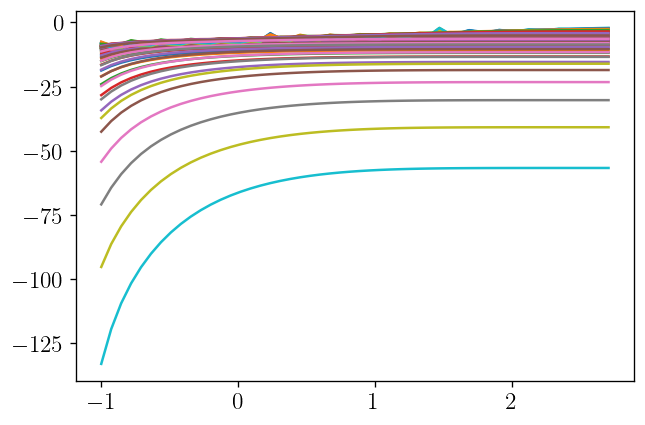

In [19]:
var_arr = []
for i, z in enumerate(d['z_range']):
    for j, dl in enumerate(d['delta_range']):
        r_arr = d['cond_sfrd_table'][i, j, :]
        # var_arr.append((np.max(r_arr) - np.min(r_arr)) / np.mean(r_arr))
        if i%5==0 and j%5==0:
            plt.plot(np.log10(d['r_range']), np.log10(r_arr))

## r dependence

In [64]:
i_z = 20
i_d = 40
lr_arr = np.log10(d['r_range'])
lv_arr = (d['cond_sfrd_table'][i_z, i_d, :])
p = np.polyfit(lr_arr, lv_arr, 6)
print(p)

[-4.90681604e-10  6.03851957e-09 -1.61836168e-08 -7.21151847e-09
  4.31479336e-08  4.26751313e-08  1.31003189e-08]


In [66]:
np.min(d['r_range']), np.max(d['r_range'])

(0.1, 512.0)

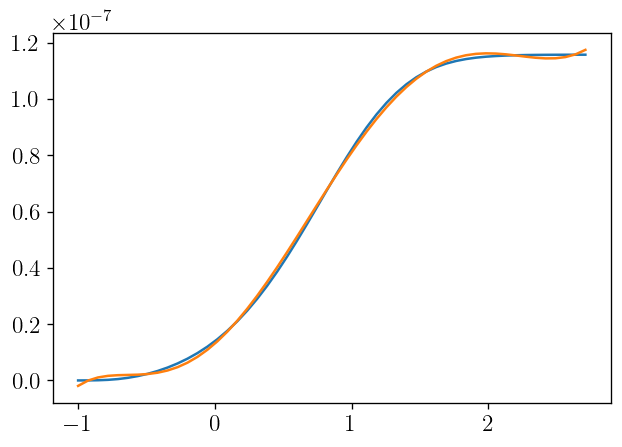

In [65]:
plt.plot(lr_arr, lv_arr)
plt.plot(lr_arr, -4.90681604e-10*lr_arr**6+6.03851957e-09*lr_arr**5-1.61836168e-08*lr_arr**4 \
    -7.21151847e-09*lr_arr**3+4.31479336e-08*lr_arr**2+4.26751313e-08*lr_arr**1+1.31003189e-08)

## delta dependence

In [61]:
i_z = 20
i_r = 25
ld_arr = d['delta_range'][25:]
lv_arr = np.log10(d['cond_sfrd_table'][i_z, 25:, i_r])
p = np.polyfit(ld_arr, lv_arr, 1)
print(p)

[  3.58160894 -11.75674659]


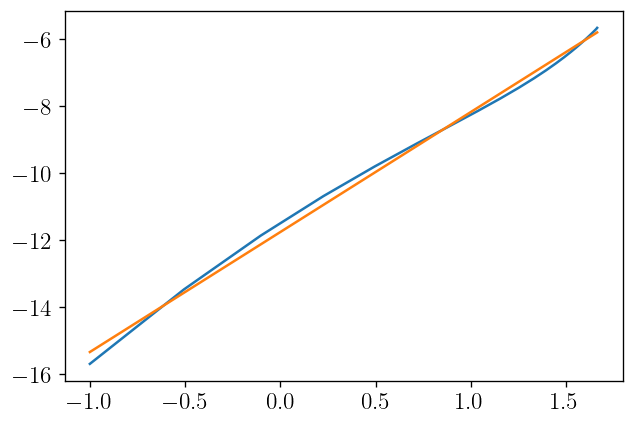

In [63]:
plt.plot(ld_arr, lv_arr)
plt.plot(ld_arr, 3.58160894*ld_arr-11.75674659)

## z dependence

In [58]:
i_d = 40
i_r = 25
lz_arr = np.log10(d['z_range'])
lv_arr = np.log10(d['cond_sfrd_table'][:, i_d, i_r])
p = np.polyfit(lz_arr, lv_arr, 3)
print(p)

[-2.67086153  6.54275943 -5.86166611 -5.06866749]


In [68]:
np.min(d['z_range']), np.max(d['z_range'])

(5.0, 50.0)

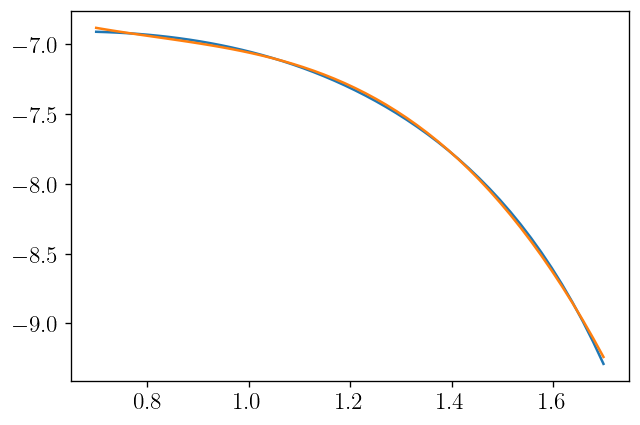

In [60]:
plt.plot(lz_arr, lv_arr)
plt.plot(lz_arr, -2.67086153*lz_arr**3+6.54275943*lz_arr**2-5.86166611*lz_arr**1-5.06866749)